### __Flight Fare Prediction__ 

#### Life cycle of this Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1. Problem Statement
- Travelling through flights has become an integral part of today’s lifestyle as more and 
more people are opting for faster travelling options. The flight ticket prices increase or 
decrease every now and then depending on various factors like timing of the flights, 
destination, and duration of flights various occasions such as vacations or festive 
season. Therefore, having some basic idea of the flight fares before planning the trip will 
surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in 
the provided dataset.

#### 2. Data Collection
- Dataset Source : [Flight Fare Prediction](https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh)
- It has 10683 Rows & 11 Columns

#### 2.1 Importing necessary python libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Importing Dataset

In [58]:
df = pd.read_excel('train.xlsx')

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### 3. Data Exploration

##### 3.1 Checking Dataset info

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### 3.2 Checking data statistics

In [60]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


##### 3.3 Checking null values

In [61]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### 3.4 Checking number of unique values in each column

In [62]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

##### 3.5 Checking dataset shape

In [64]:
df.shape

(10683, 11)

#### 4. Exploratory Data Analysis

##### 4.1 Handling missing values

In [65]:
df.dropna(axis=0,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### 4.2 Handling Categorical values

In [66]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [67]:
df['Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['Day'] = pd.to_datetime(df['Date_of_Journey']).dt.day

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [68]:
df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [69]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [70]:
df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


#### 5. Feature engineering

##### Encoding categorical features

In [71]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,16,50,21,35


In [72]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [73]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

##### Dropping unnecessary columns

In [74]:
df.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,3,1,16,50,21,35


In [75]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

#### Converting 'Duration' column data into minutes

In [76]:
def convert_duration(Duration):
        if len(Duration.split()) == 2:
            hours = int(Duration.split()[0][: -1])
            minutes = int(Duration.split()[1][: -1])
            return hours * 60 + minutes
        else:
            return int(Duration[: -1]) * 60

In [77]:
df['Duration'] = df['Duration'].apply(convert_duration)

df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,3,1,16,50,21,35


In [97]:
df.describe()

,Duration,Total_Stops,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.048118,0.824190,9087.214567,4.708575,13.509081,12.491013,24.409287,13.349186,24.690601
std,507.803454,0.675229,4611.548810,1.164408,8.479363,5.748820,18.767801,6.859317,16.506808
min,75.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,1.000000,8372.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,4.000000,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Duration        10682 non-null  int64 
 4   Total_Stops     10682 non-null  int64 
 5   Price           10682 non-null  int64 
 6   Month           10682 non-null  int32 
 7   Day             10682 non-null  int32 
 8   Dep_Hour        10682 non-null  int32 
 9   Dep_Minute      10682 non-null  int32 
 10  Arrival_Hour    10682 non-null  int32 
 11  Arrival_Minute  10682 non-null  int32 
dtypes: int32(6), int64(3), object(3)
memory usage: 1.1+ MB


#### OneHotEncoding categorical values 

In [138]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']

for col in cat_columns:
    dummies = pd.get_dummies(df[col],drop_first=True)
    df.drop(col,axis=1,inplace=True)
    df = pd.concat([df,dummies],axis=1)

df.head()

,Duration,Total_Stops,Price,Month,Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,170,0,3897,3,24,22,20,1,10,False,...,False,False,False,False,False,False,False,False,False,True
1,445,2,7662,5,1,5,50,13,15,True,...,False,False,False,True,False,False,False,False,False,False
2,1140,2,13882,6,9,9,25,4,25,False,...,False,False,True,False,False,True,False,False,False,False
3,325,1,6218,5,12,18,5,23,30,False,...,False,False,False,True,False,False,False,False,False,False
4,285,1,13302,3,1,16,50,21,35,False,...,False,False,False,False,False,False,False,False,False,True


#### Data Visualisation

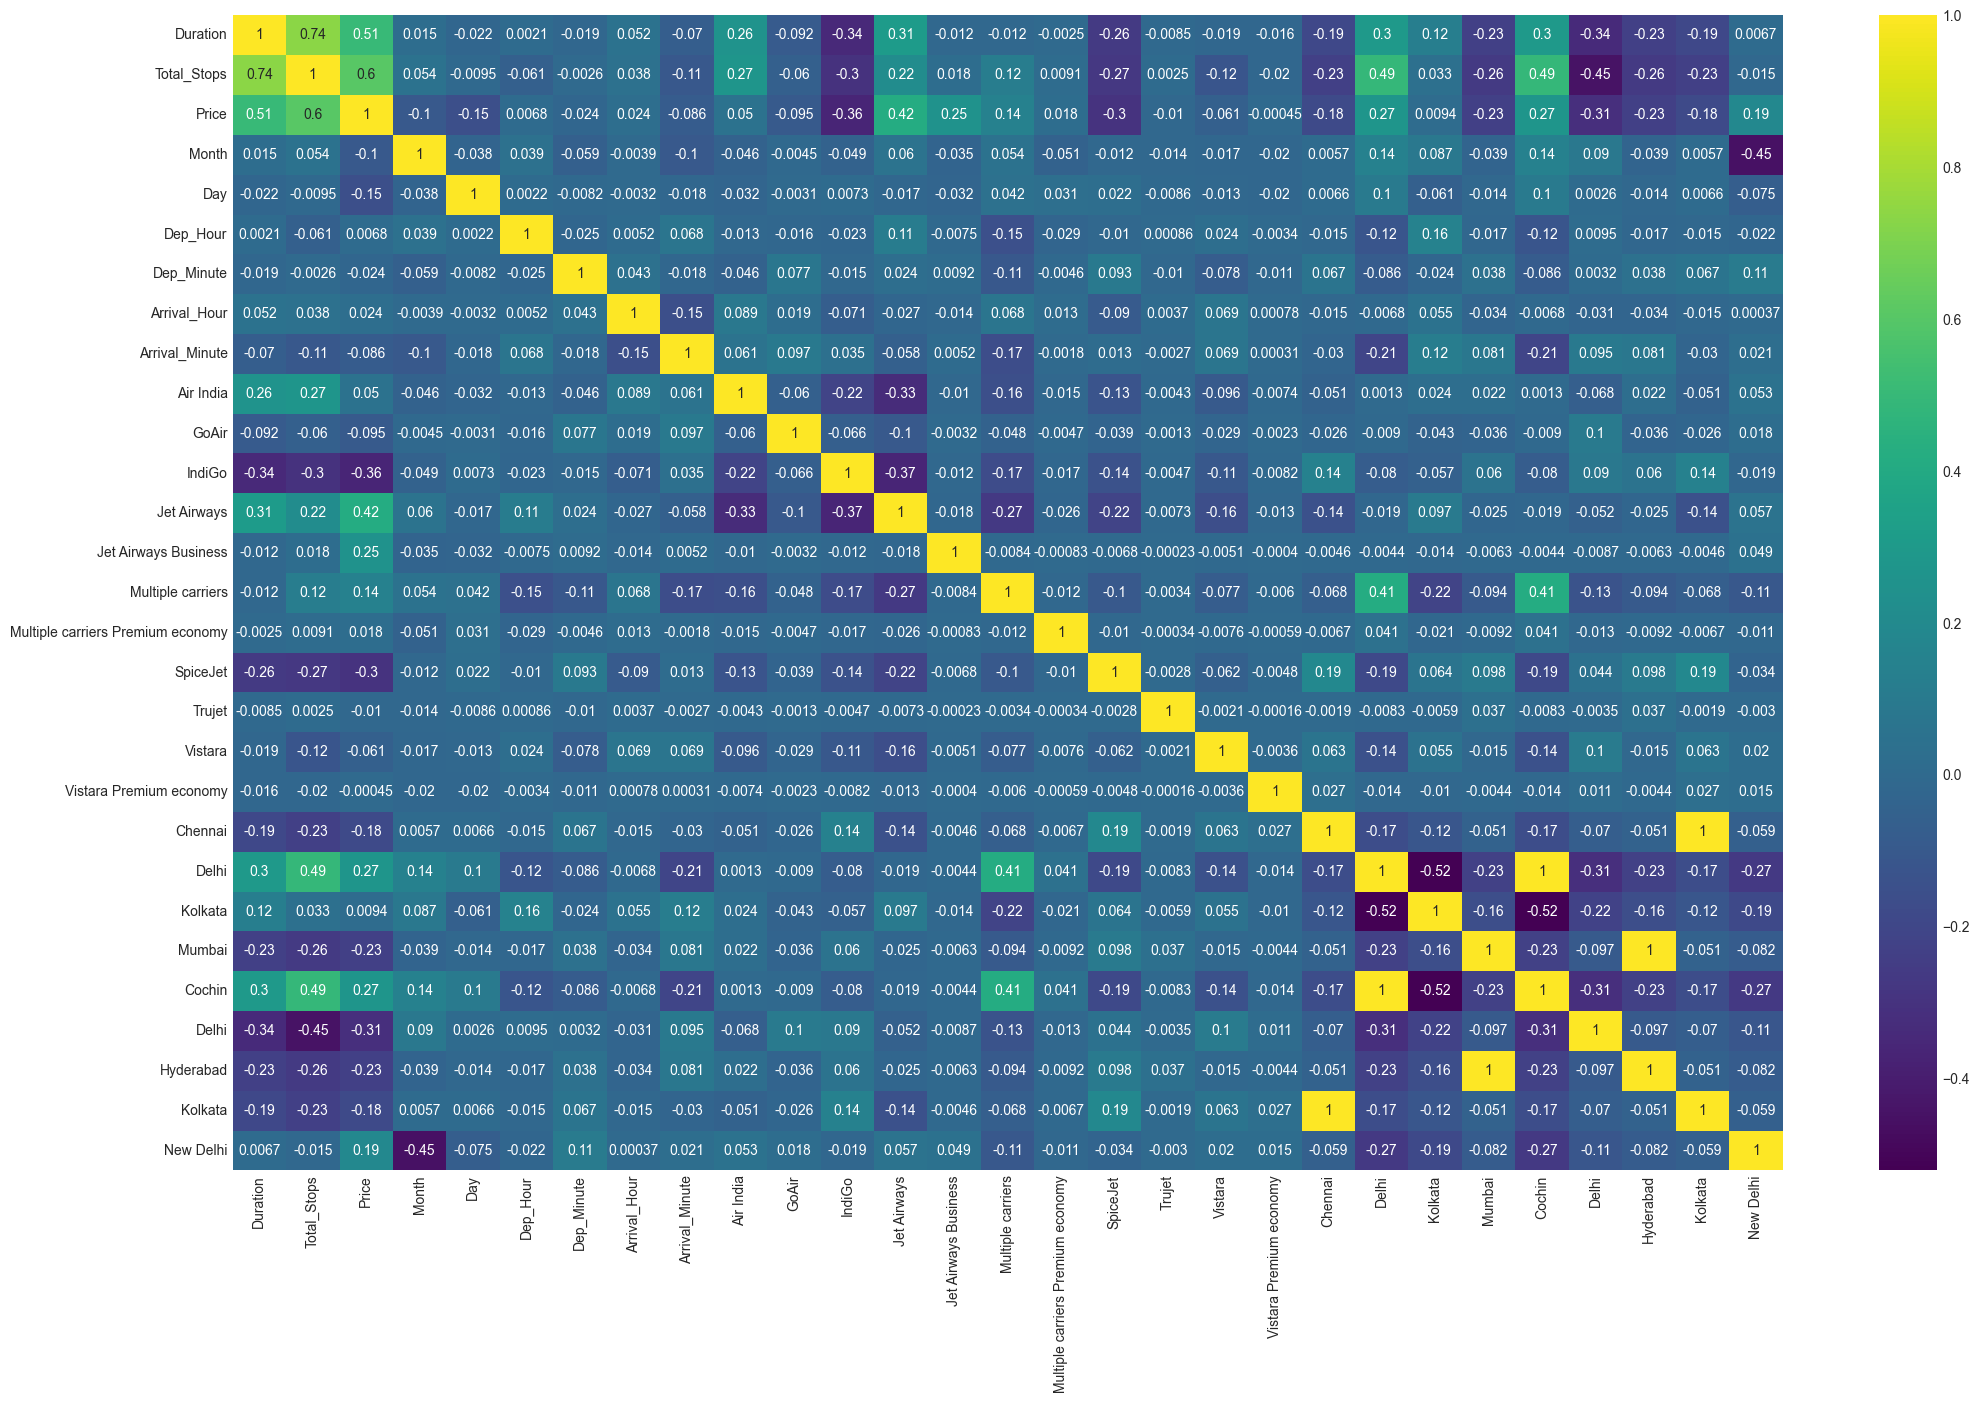

In [235]:
#This code is creating a heatmap of the correlation matrix of the DataFrame `df`.
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

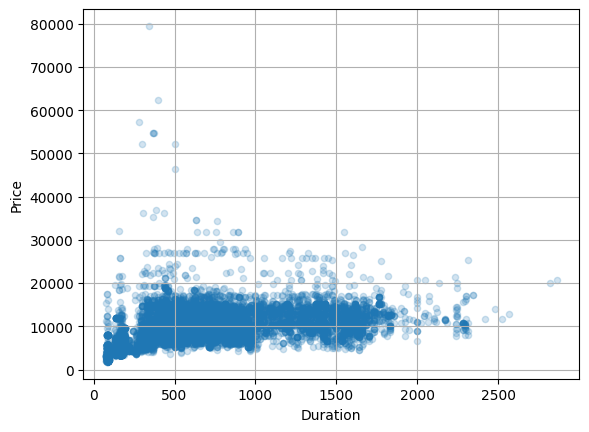

In [141]:
#This line of code is creating a scatter plot using the DataFrame `df`. It specifies that the 'Duration' column should be used for the x-axis and the 'Price' column for the y-axis. The `grid=True` argument adds a grid to the plot, and `alpha=0.2` sets the transparency of the data points to 0.2. Finally, `plt.show()` displays the plot.
df.plot(kind='scatter',x='Duration',y='Price',grid=True,alpha=0.2)
plt.show()

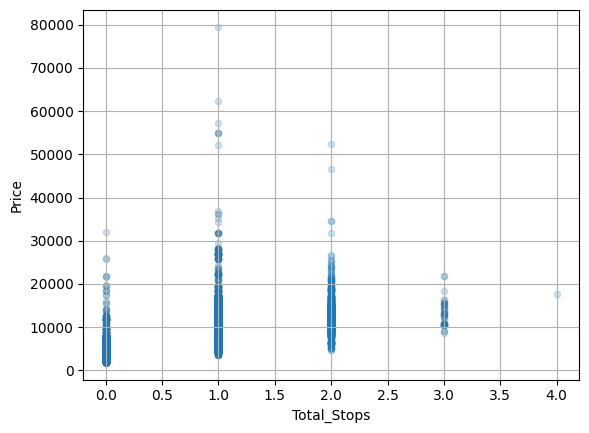

In [133]:
df.plot(kind='scatter',x='Total_Stops',y='Price',grid=True,alpha=0.2)
plt.show()

In [178]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


y = df['Price']
X = df.drop(columns=['Price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)




In [188]:
from sklearn.metrics import mean_absolute_error, r2_score

#This Python function `eval_model` is used for evaluating a machine learning model. Here's a breakdown of what it does:
def eval_model(model,params,X_train,y_train,X_test,y_test):
    rs = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='neg_mean_squared_error', cv=5, n_iter=10, n_jobs=-1, random_state=42)
    rs.fit(X_train, y_train)
    model.set_params(**rs.best_params_)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(preds,y_test)
    r2_square = r2_score(preds,y_test)
    print(f'Model : {model}')
    print(f'Mean Absolute Error : {mae}')
    print(f'R2 Score : {r2_square}')

In [189]:
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoost': GradientBoostingRegressor()
}
params = {
            "RandomForest": {
                "n_estimators": [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
                "max_features": ["log2", "sqrt"],
                "max_depth": [int(x) for x in np.linspace(5, 30, num=6)],
            },
            "GradientBoost": {
                "loss": ["squared_error", "huber", "absolute_error", "quantile"],
                "learning_rate": [0.1, 0.01, 0.05, 0.001],
                "subsample": [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
                "n_estimators": [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
            }
        }
for model in models:
    model_name = models[model]
    for param in params:
        model_params = params[model]
        eval_model(model_name,model_params,X_train, y_train,X_test,y_test)

Model : RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=600)
Mean Absolute Error : 1256.5537571813672
R2 Score : 0.7781575113853743
Model : RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=600)
Mean Absolute Error : 1255.176143035059
R2 Score : 0.7755474008320971
Model : GradientBoostingRegressor(loss='huber', n_estimators=900, subsample=0.7)
Mean Absolute Error : 1230.2768612457899
R2 Score : 0.8109585705318502
Model : GradientBoostingRegressor(loss='huber', n_estimators=900, subsample=0.7)
Mean Absolute Error : 1217.4328098929627
R2 Score : 0.8122403702935458


In [192]:
model = GradientBoostingRegressor(loss='huber',n_estimators=900,subsample=0.7)
model.fit(X_train,y_train)
preds = model.predict(X_test)
mae = mean_absolute_error(y_test,preds)
r2_square = r2_score(y_test,preds)
score = model.score(X_train,y_train)
print(f'Mean Absolute Error : {mae}')
print(f'R2 Score : {r2_square}')
print(f'Score : {score}')

Mean Absolute Error : 1235.345275919384
R2 Score : 0.8409188076080756
Score : 0.8570785455486823


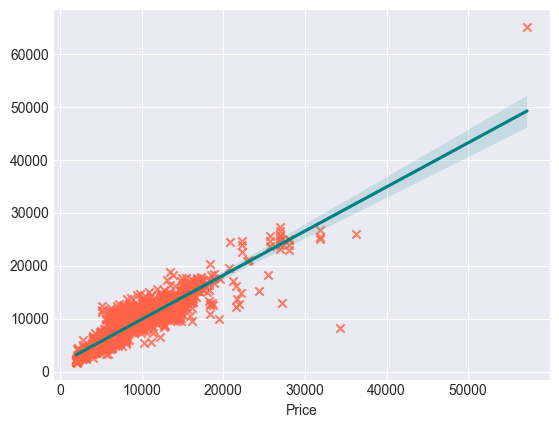

In [218]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.regplot(x=y_test,y=preds,marker='x',line_kws=dict(color='teal'),color='tomato',ci=99)
plt.show()

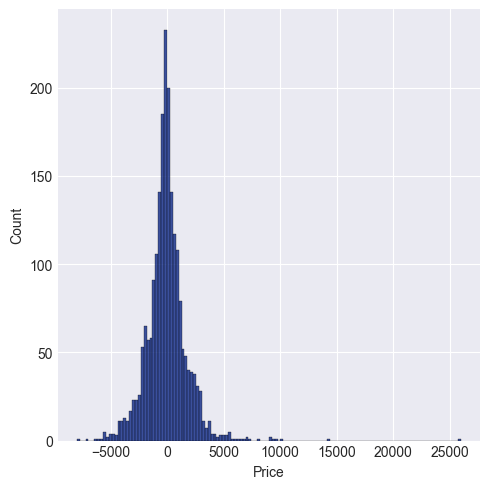

In [224]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.displot(y_test-preds)
plt.show()

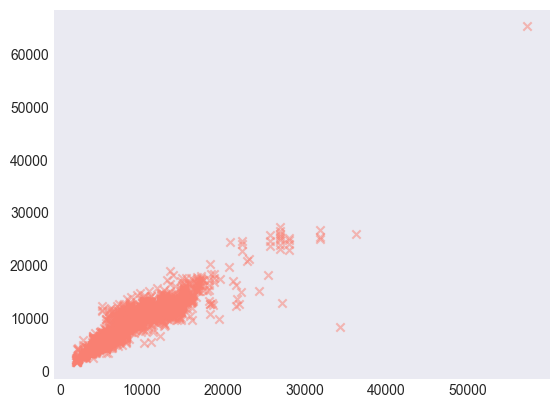

In [234]:
plt.scatter(y_test,preds,alpha=0.5,marker='x',c='salmon',cmap='RdPu')
plt.grid()
plt.show()